<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/overSampling_creditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries
```

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('label_TestData.csv')
df.head()

,Unnamed: 0,CustomID,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2,group
0,0,C00001,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
1,1,C00002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2,C00003,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
3,3,C00004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
4,4,C00005,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
df.describe()

,Unnamed: 0,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2,group
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,0.969231,0.974359,0.974359,0.974359,0.0,0.010256,0.020513,0.005128,0.020513,0.010256,0.020513,0.010256,0.025641,0.025641,0.020513,5.041026
std,56.435804,0.173136,0.158469,0.158469,0.158469,0.0,0.101013,0.142111,0.071611,0.142111,0.101013,0.142111,0.101013,0.158469,0.158469,0.142111,0.535694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,48.500000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,97.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,145.500000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,194.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [6]:
# Good No Null Values!
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Unnamed: 0', 'CustomID', 'A', 'B', 'C', 'D', 'A1', 'A2', 'A3', 'A4',
       'B1', 'B2', 'B3', 'B4', 'C1', 'D1', 'D2', 'group'],
      dtype='object')

In [12]:
count=df['group'].value_counts()
count

5    190
9      3
3      2
Name: group, dtype: int64

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('group 1', round(df['group'].value_counts()[5]/len(df) * 100,2), '% of the dataset')
print('group 2', round(df['group'].value_counts()[9]/len(df) * 100,2), '% of the dataset')
print('group 3', round(df['group'].value_counts()[3]/len(df) * 100,2), '% of the dataset')

group 1 97.44 % of the dataset
group 2 1.54 % of the dataset
group 3 1.03 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (5: Normal || 9: Fraud1 || 3: Fraud2)')

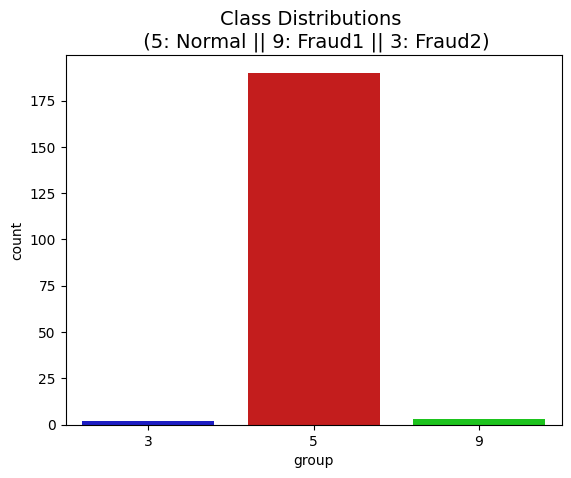

In [17]:
colors = ["#0101DF", "#DF0101", "#01DF01"]

sns.countplot(x='group', data=df, palette=colors)
plt.title('Class Distributions \n (5: Normal || 9: Fraud1 || 3: Fraud2)', fontsize=14)